In [1]:
from data_exploration import *

0/876
100/876
200/876
300/876
400/876
500/876
600/876
700/876
800/876


In [84]:
docs

{'10_1': [36 annotations, 18 relations],
 '10_1010': [4 annotations, 2 relations],
 '10_1012': [52 annotations, 26 relations],
 '10_1014': [48 annotations, 24 relations],
 '10_1018': [92 annotations, 46 relations],
 '10_1037': [20 annotations, 10 relations],
 '10_1045': [108 annotations, 54 relations],
 '10_1048': [38 annotations, 19 relations],
 '10_124': [8 annotations, 4 relations],
 '10_133': [26 annotations, 13 relations],
 '10_14': [200 annotations, 100 relations],
 '10_159': [26 annotations, 13 relations],
 '10_162': [38 annotations, 19 relations],
 '10_17': [4 annotations, 2 relations],
 '10_175': [48 annotations, 24 relations],
 '10_190': [0 annotations, 0 relations],
 '10_197': [34 annotations, 17 relations],
 '10_203': [54 annotations, 27 relations],
 '10_208': [24 annotations, 12 relations],
 '10_211': [44 annotations, 22 relations],
 '10_231': [34 annotations, 17 relations],
 '10_238': [82 annotations, 41 relations],
 '10_244': [76 annotations, 38 relations],
 '10_248': [1

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
for key, edges in relation_types.items():
    print(key, set(edges))

manner/route {'Drug => Route', 'Route => Route'}
reason {'Drug => Indication', 'Indication => Indication'}
severity_type {'ADE => Severity', 'SSLIF => Severity', 'Severity => Severity', 'Indication => Severity'}
do {'Drug => Dose', 'Dose => Dose'}
fr {'Frequency => Frequency', 'Drug => Frequency'}
du {'Drug => Duration', 'Duration => Duration'}
adverse {'Drug => ADE', 'SSLIF => ADE', 'ADE => ADE'}


In [12]:
# {do: {
#   'Drug => Dose': 5150,
#    'Dose => Drug': 27
#}}
type_dists = {}
for key, edges in relation_types.items():
    type_dists[key] = defaultdict(int)
    for edge in edges:
        type_dists[key][edge] += 1

In [15]:
type_dists

{'adverse': defaultdict(int,
             {'ADE => ADE': 23, 'Drug => ADE': 2055, 'SSLIF => ADE': 4}),
 'do': defaultdict(int, {'Dose => Dose': 27, 'Drug => Dose': 5150}),
 'du': defaultdict(int, {'Drug => Duration': 901, 'Duration => Duration': 5}),
 'fr': defaultdict(int,
             {'Drug => Frequency': 4407, 'Frequency => Frequency': 12}),
 'manner/route': defaultdict(int,
             {'Drug => Route': 2544, 'Route => Route': 7}),
 'reason': defaultdict(int,
             {'Drug => Indication': 4530, 'Indication => Indication': 24}),
 'severity_type': defaultdict(int,
             {'ADE => Severity': 282,
              'Indication => Severity': 269,
              'SSLIF => Severity': 2909,
              'Severity => Severity': 16})}

In [25]:
types = sorted(relation_types.keys(), key=lambda x:len(relation_types[x]), reverse=True)
types = [(t, len(relation_types[t])) for t in types]
types

[('do', 5177),
 ('reason', 4554),
 ('fr', 4419),
 ('severity_type', 3476),
 ('manner/route', 2551),
 ('adverse', 2082),
 ('du', 906)]

In [27]:
list(zip(*types))

[('do', 'reason', 'fr', 'severity_type', 'manner/route', 'adverse', 'du'),
 (5177, 4554, 4419, 3476, 2551, 2082, 906)]

In [28]:
# Plot distribution of edge types
#x, y = zip(*sorted(type_to_type_edges.items(), key=lambda x:x[1], reverse=True))
x, y = zip(*types)
#plt.xticks(labels)
#plt.xlabel(labels, rotation="vertical")
labels = [name if i % 1 ==0 else '' for (i, name) in enumerate(x)]

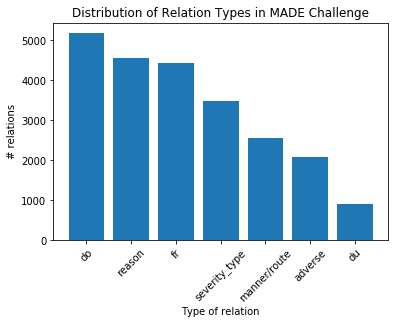

In [38]:
fig, ax = plt.subplots()
ax.bar(range(len(x)), y, )
plt.xticks(range(len(x)), labels, rotation=45) 
plt.xlabel("Type of relation")
plt.ylabel("# relations")
_= plt.title("Distribution of Relation Types in MADE Challenge")



In [39]:
plt.savefig('relation_types_dist.png')

In [81]:
import random
import re

def print_relation_examples(relation_type, docs, thresh=100):
    doc_names = list(docs.keys())
    random.shuffle(doc_names)
    examples = []
    count = 0
    for filename in doc_names:
        doc = docs[filename]
        for relation in doc.relations:
            if relation.type == relation_type:
                examples.append((doc, relation))
                
    
    strings = []   
    i = 0
    random.shuffle(examples)
    for doc, relation in examples[:thresh]:
        i += 1
        first_span = relation.annotation_1.span
        second_span = relation.annotation_2.span
        sorted_entities = sorted((relation.annotation_1, relation.annotation_2), key=lambda x:x.span[0])
        entity1, entity2 = sorted_entities
        start, end = relation.span
        string = ''
        string += doc.text[start -40 : start]
        string += '<{}>'.format(relation_type.upper())
        string += '<{}>'.format(entity1.type.upper())
        string += entity1.text
        string += '</{}>'.format(entity1.type.upper())
        string += doc.text[entity1.span[1]:entity2.span[0]]
        string += '<{}>'.format(entity2.type.upper())
        string += entity2.text
        string += '</{}>'.format(entity2.type.upper())
        string += '</{}>\n\n'.format(relation_type.upper())
        string += doc.text[end: end+40]
        #print(string)
        string = re.sub('\n', ' ', string)
        string = re.sub('\t', ' ', string)
        string = re.sub('  ', ' ', string)
        strings.append(string)
    return strings
    
    
    
examples = print_relation_examples('do', docs)

In [82]:
examples[30]

'of bleeding..   Supplemental Orders: <DO><DRUG>Calcium gluconate</DRUG> <DOSE>10% solution. 10 ml in 50 ml of 0.9% NaCl</DOSE></DO>  to run via peripheral IV over 2 hours. '

In [83]:
for relation in relation_types.keys():
    outpath = 'data_exploration_results/{}_examples.txt'.format(re.sub('/', '_', relation))
    examples = print_relation_examples(relation, docs)
    #print(examples[:5])
    #print()
    with open(outpath, 'w') as f:
        f.write('\n\n'.join(examples))

In [16]:
## Find some specific examples of the most common relation, ('Drug', 'Dose')
drug_doses = {}

for filename, doc in docs.items():
    if len(drug_doses) >= 25:
        break
    for relation in doc.relations:
        if relation.entity_types == ('Drug', 'Dose'):
            drug_doses[doc] = relation
            continue
            
    
        
    

NameError: name 'examples' is not defined

In [11]:
for doc, relation in list(drug_doses.items())[:25]:
    start, end = relation.span
    print(doc.text[start - 10: end + 10])

es daily, ciprofloxacin 500 mg daily in 
oximately 10 mL of 2% lidocaine was then 
r nausea, ambien 5mg po qhs pr
r off his steroids by 10 mg every 2 weeks, he continues on 20mg every oth
a day and valacyclovir 500 mg p.o. t.i.
ed p.o.  
vancomycin 125 mg 4 times d
is taking Rapamune 5.5 mg every Mon
ntinue on omeprazole 20 mg p.o. dail
r day and Rapamune 0.5 mg twice a w
h will be high-dose methotrexate and cytarabine in the ea
esthesia: Lidocaine 1%;  mL subc
g off his steroids.  He is going to be taking 20 mg every other day alternating with 10 mg every oth
00 units, Noxafil 200 mg, magnesiu
1 dose of Rituxan at 500 mg/m2 today.  

 received 2 doses of rituximab along wit
 PO Qday, Oxycodone-Acetaminophen 5-325 mg PO Q 4-6 
cations  
levothyroxine (Synthroid) 150 mcg Tablet, Ordered By: [** Name **]  [** Name **]  
Directions: 1 tablet oral DAIL
s to take gabapentin 200 mg twice a d
e current dapsone tablets,  he will
s daily  
dexamethasone 4 mg Tablet, Ordered By: [** Name **] [**

In [92]:
# What is the distribution of spans for the different classes?
relation_spans = defaultdict(list)
relation_names = relation_types.keys()

for filename, doc in docs.items():
    for relation in doc.relations:
        relation_spans[relation.type].append(relation.span[1] - relation.span[0])

    
relation_spans

defaultdict(list,
            {'adverse': [39,
              288,
              129,
              48,
              53,
              159,
              42,
              91,
              77,
              57,
              120,
              61,
              42,
              46,
              254,
              201,
              2309,
              2367,
              41,
              30,
              98,
              85,
              51,
              61,
              82,
              3091,
              371,
              356,
              249,
              277,
              66,
              87,
              118,
              41,
              148,
              135,
              110,
              591,
              92,
              105,
              78,
              91,
              63,
              76,
              135,
              160,
              208,
              122,
              109,
              84,
              565,
              243,
      

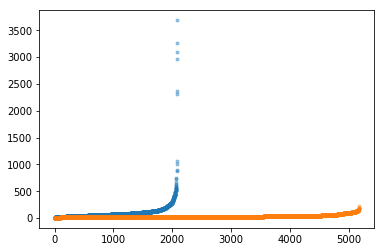

In [103]:
plt.plot(range(len(sorted(relation_spans['adverse']))), sorted(relation_spans['adverse']),
        marker='.', linestyle='none', alpha=0.4)
plt.plot(range(len(sorted(relation_spans['do']))), sorted(relation_spans['do']),
        marker='.', linestyle='none', alpha=0.4)

---reason---
Max span length: 2777
Min span length: 3
Mean span length: 127.69367588932806
Standard Devation span length: 176.05863228528833
---severity_type---
Max span length: 1873
Min span length: 4
Mean span length: 30.95886075949367
Standard Devation span length: 36.504484950303585
---adverse---
Max span length: 3686
Min span length: 4
Mean span length: 105.05715658021134
Standard Devation span length: 181.2484167321182


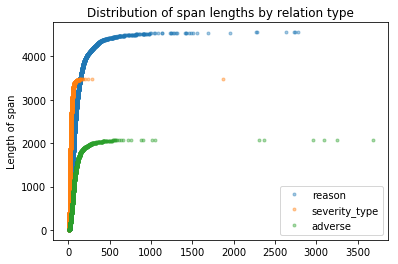

In [196]:
import numpy as np
def plot_spans_ecdf(relation_spans, types,):
    for relation_type in types:
        spans = relation_spans[relation_type]
        x = range(len(spans))
        y = sorted(spans)
        plt.plot(y, x, marker='.', linestyle='none', alpha=0.4)
        #plt.ylim((0, 4000))
        plt.title("Distribution of span lengths by relation type")
        print("---{}---".format(relation_type))
        print("Max span length: {}".format(max(y)))
        print("Min span length: {}".format(min(y)))
        print("Mean span length: {}".format(np.mean(y)))
        print("Standard Devation span length: {}".format(np.std(y)))
    plt.ylabel('Length of span')
    plt.legend(types)
    plt.show()
    
plot_spans_ecdf(relation_spans, ['reason', 'severity_type',
                                 'adverse'])

In [136]:
relation_spans.keys()

dict_keys(['manner/route', 'reason', 'severity_type', 'do', 'fr', 'du', 'adverse', <class 'type'>])

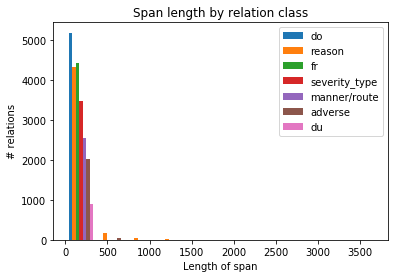

---do---
Max span length: 229
Min span length: 3
Mean span length: 29.67007919644582
Standard Devation span length: 23.77363506932444
---reason---
Max span length: 2777
Min span length: 3
Mean span length: 127.69367588932806
Standard Devation span length: 176.05863228528833
---fr---
Max span length: 225
Min span length: 5
Mean span length: 46.18397827562797
Standard Devation span length: 32.64282567138077
---severity_type---
Max span length: 1873
Min span length: 4
Mean span length: 30.95886075949367
Standard Devation span length: 36.504484950303585
---manner/route---
Max span length: 235
Min span length: 4
Mean span length: 35.55233241865935
Standard Devation span length: 27.83083498177647
---adverse---
Max span length: 3686
Min span length: 4
Mean span length: 105.05715658021134
Standard Devation span length: 181.2484167321182
---du---
Max span length: 287
Min span length: 6
Mean span length: 39.57064017660044
Standard Devation span length: 29.392487120838766


In [169]:
import numpy as np
def hist_spans_ecdf(relation_spans, types, xlim=None, ylim=None):
    x = [relation_spans[relation_type] for relation_type in types]
    if xlim:
        plt.xlim((0, xlim))
    if ylim:
        plt.ylim((0, ylim))
    plt.title("Span length by relation class")
    plt.ylabel('# relations')
    plt.xlabel('Length of span')
    plt.hist(x)
    plt.legend(types)
    plt.show()
    
    for relation_type in types:
    
        print("---{}---".format(relation_type))
        print("Max span length: {}".format(max(relation_spans[relation_type])))
        print("Min span length: {}".format(min(relation_spans[relation_type])))
        print("Mean span length: {}".format(np.mean(relation_spans[relation_type])))
        print("Standard Devation span length: {}".format(np.std(relation_spans[relation_type])))
    
    return 
    
hist_spans_ecdf(relation_spans, ['do','reason', 'fr', 'severity_type',
                                'manner/route', 'adverse', 'du'], 
               )

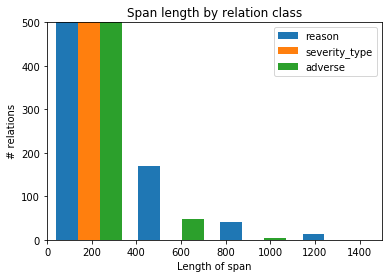

---reason---
Max span length: 2777
Min span length: 3
Mean span length: 127.69367588932806
Standard Devation span length: 176.05863228528833
---severity_type---
Max span length: 1873
Min span length: 4
Mean span length: 30.95886075949367
Standard Devation span length: 36.504484950303585
---adverse---
Max span length: 3686
Min span length: 4
Mean span length: 105.05715658021134
Standard Devation span length: 181.2484167321182


In [190]:
hist_spans_ecdf(relation_spans, ['reason', 'severity_type',
                                 'adverse'
                                ], 
               xlim=1500,
                ylim=500
               )

([array([ 536.,  243.,   76.,   25.,   12.,    4.,    7.,    2.,    0.,    1.]),
  array([  2.27100000e+03,   1.26600000e+03,   3.23000000e+02,
           2.77000000e+02,   2.44000000e+02,   2.80000000e+01,
           8.00000000e+00,   2.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([   5. ,   33.2,   61.4,   89.6,  117.8,  146. ,  174.2,  202.4,
         230.6,  258.8,  287. ]),
 <a list of 2 Lists of Patches objects>)

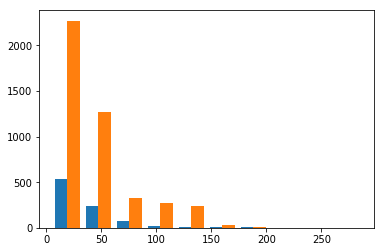

In [149]:
plt.hist([relation_spans['du'], relation_spans['fr']])

In [201]:
anno1_first = 0
anno2_second = 0
for doc in docs.values():
    for relat in doc.relations:
        if relat.annotation_1.span[0] < relat.annotation_2.span[0]:
            anno1_first += 1
        else:
            anno2_second += 1


In [202]:
anno1_first

14059

In [203]:
anno2_second

9106